<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Shootings over time
---

## Overview

Generating a cluster of charts for the homepage: what has changed, if anything, over time?
* Deaths of officers from gunfire (ODMP) 
* Deaths of civilians from OIS (OIS database - since 2015) 
* Custodial deaths overall (CDR database - since 2005) 
* Murders in Texas from gunfire (Crime in Texas reports) 

## Datasets used
* `tji/deaths-in-custody/cleaned_custodial_death_reports.csv`
* `tji/auxiliary-datasets/census_data_by_county.csv`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)
---

In [1]:
import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

%load_ext watermark
%watermark -a 'Everett Wetchler' -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2018-05-31 19:56:29 PDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
watermark 1.5.0


In [2]:
from lib.utils import *
from lib.style import *

plotsaver = PlotSaver('../plots', 'home_page_2', numbering=False)

Removing 0 past plots


## [ Read ALL the datasets ]

In [3]:
DATE_FMT = '%Y-%m-%d'

In [4]:
datasets = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
odmp = datasets.dataframes['odmp_texas_line_of_duty_deaths']
print("ODMP data read for %d officers, %s to %s" % (
    len(odmp), odmp.date_of_death.min().strftime(DATE_FMT), odmp.date_of_death.max().strftime(DATE_FMT)))

ODMP data read for 1588 officers, 1840-03-19 to 2018-08-09


In [5]:
datasets = dw.load_dataset('tji/deaths-in-custody', force_update=True)
cdr = datasets.dataframes['cleaned_custodial_death_reports']
print("CDR data read for %d deaths, from %s to %s" % (
    len(cdr), cdr.death_date_and_time.min().strftime(DATE_FMT),
    cdr.death_date_and_time.max().strftime(DATE_FMT)))

CDR data read for 8730 deaths, from 2005-01-01 to 2018-04-23


In [6]:
frame = cdr[cdr.type_of_custody == 'POLICE CUSTODY (PRE-BOOKING)']
frame = frame[frame.means_of_death == 'FIREARM']
frame = frame[(frame.manner_of_death == 'HOMICIDE') &
              (frame.who_caused_death_in_homicide_or_accident == 'LAW ENFORCEMENT/CORRECTIONAL PERSONNEL')]
print(len(frame), len(cdr))

777 8730


Saving plot to ../plots/home_page_2_shooting_deaths_over_time_odmp_cdr.png


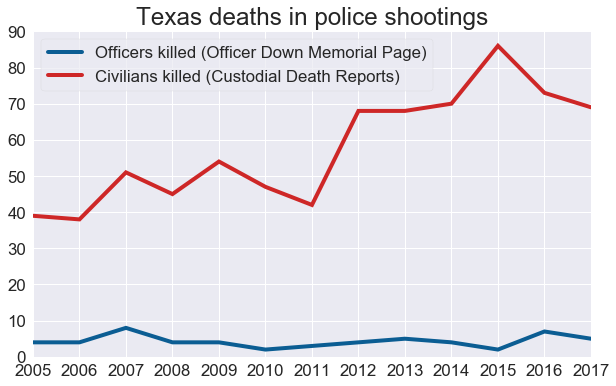

In [7]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)

s1 = odmp[odmp.cause_of_death == 'GUNFIRE']['date_of_death'].dt.year.value_counts().sort_index()
s1.loc[2005:2017].plot(ax=ax, label='Officers killed (Officer Down Memorial Page)')
s2 = frame['death_date_and_time'].dt.year.value_counts().sort_index()
s2.loc[2005:2017].plot(ax=ax, label='Civilians killed (Custodial Death Reports)')

ax.set_ylim(0, ax.get_ylim()[1])
ax.set_title('Texas deaths in police shootings')
ax.set_yticks(np.arange(0, ax.get_ylim()[1] + 5, 10))
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1, 1))
ax.set_xlabel('')
ax.legend(loc='upper left')
plotsaver.saveplot(fig, 'shooting_deaths_over_time_odmp_cdr', dpi=300)

In [8]:
s = s2.loc[2005:2017]
print('r = %.2f, p = %.5f' % stats.pearsonr(list(range(len(s))), s.values))

r = 0.86, p = 0.00016
